## Plotting a station choropleth over a region choropleth

In [4]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [5]:
gdf = gpd.read_file('acs_11_19_merged_stn+rgn-copy.geojson')

In [6]:
list(gdf['% Change Foreign Born'])

[-5.5694406194697175,
 -4.277400569577999,
 -0.8808613558808853,
 -10.516912806672652,
 2.453619491342429,
 -3.622162288535252,
 -2.2896514853121888,
 -0.8861909595789863,
 -6.164557689859251,
 -0.3415754081779132,
 -8.7530822571036,
 -1.0271590648890605,
 -4.0439641914684685,
 -6.878426769290208,
 -11.238443466386205,
 -8.071816048903525,
 -8.189194278130923,
 -15.220711412239208,
 -9.684103458297011,
 -10.857844184946986,
 -3.6588240662535743,
 -0.893020474377082,
 -8.88951203648529,
 -5.323940092620716,
 -11.63872790345028,
 -12.169810681781678,
 -11.876629478816803,
 -4.948667458063527,
 0.22306780019955008,
 -4.559352097884462,
 -13.512801349124215,
 -8.479533652377564,
 -11.080917524093897,
 -4.162350602558601,
 -1.410156547553948,
 -2.872164147696732,
 -7.2110629213681054,
 -13.048409702235553,
 -12.777058371366657,
 -18.172199530367866,
 -18.19263222885367,
 -1.5025396108776734,
 0.4653178640732558,
 -5.326062081757554,
 -7.298001547377487,
 1.6604081930056025,
 2.3927438125867

In [7]:
gdf.sample(10)

FIPS                           Census Tract  11 Total Population  \
100  06037207502  Census Tract 2075.02, Los Angeles, CA               2111.0   
71   06037203900     Census Tract 2039, Los Angeles, CA               2770.0   
15   06037183520  Census Tract 1835.20, Los Angeles, CA               3990.0   
128  06037432000     Census Tract 4320, Los Angeles, CA               7870.0   
148  06037462400     Census Tract 4624, Los Angeles, CA               4251.0   
213  06037980010  Census Tract 9800.10, Los Angeles, CA                184.0   
138  06037461700     Census Tract 4617, Los Angeles, CA               1558.0   
147  06037462302  Census Tract 4623.02, Los Angeles, CA               2885.0   
163  06037464000     Census Tract 4640, Los Angeles, CA               5525.0   
135  06037461501  Census Tract 4615.01, Los Angeles, CA               3888.0   

     11 Total Foreign Born  11 Total Entered 2000 or later  11 Europe  \
100                 1319.0                           280.0        0.0   
71                  1282.0                           291.0        0.0   
15                  1714.0                           345.0       22.0   
128                 3842.0                           617.0       34.0   
148                 1090.0                           219.0      129.0   
213                   61.0                             6.0        9.0   
138                  211.0                            27.0       34.0   
147                  687.0                           221.0       72.0   
163                 1347.0                           123.0      179.0   
135                 1268.0                           117.0       40.0   

     11 Europe Entered 2000 or later  11 Asia  11 Asia Entered 2000 or later  \
100                              0.0   1208.0                          266.0   
71                               0.0      0.0                            0.0   
15                               0.0     11.0                            0.0   
128                             16.0   3617.0                          575.0   
148                             24.0    455.0                           87.0   
213                              0.0     38.0                            1.0   
138                              0.0     53.0                            0.0   
147                             72.0    441.0                           46.0   
163                             16.0    666.0                           10.0   
135                              0.0    146.0                           20.0   

     11 Latin America  ...  19 Other Central America  \
100              97.0  ...                      39.0   
71             1282.0  ...                     255.0   
15             1681.0  ...                     324.0   
128             160.0  ...                      86.0   
148             345.0  ...                      94.0   
213              12.0  ...                       0.0   
138             104.0  ...                      24.0   
147             143.0  ...                      61.0   
163             430.0  ...                       6.0   
135            1008.0  ...                     125.0   

     19 Other Central America Entered 2010 or later  19 South America  \
100                                             0.0               9.0   
71                                             17.0               0.0   
15                                             16.0              38.0   
128                                             0.0               0.0   
148                                             0.0              60.0   
213                                             0.0               1.0   
138                                             1.0              21.0   
147                                             0.0             184.0   
163                                             0.0              64.0   
135                                            32.0              27.0   

     19 South America Ent

In [8]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [9]:
def stn_map(region = 'San Gabriel Valley', column = '% Change Foreign Born'):
    
    #this region
    this_region = gdf_web_mercator[gdf_web_mercator['region']==region]
                
    # plot it
    fig,ax = plt.subplots(figsize=(15, 15))
                
    this_region.plot(ax=ax,
                column=column, 
                vmin=-25,
                vmax=25,
                alpha=0.8,
                cmap="RdBu",
                legend=True)
    

#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    ax.set_title(region + ' % Change in Foreign Born Population', fontsize=17)
    
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

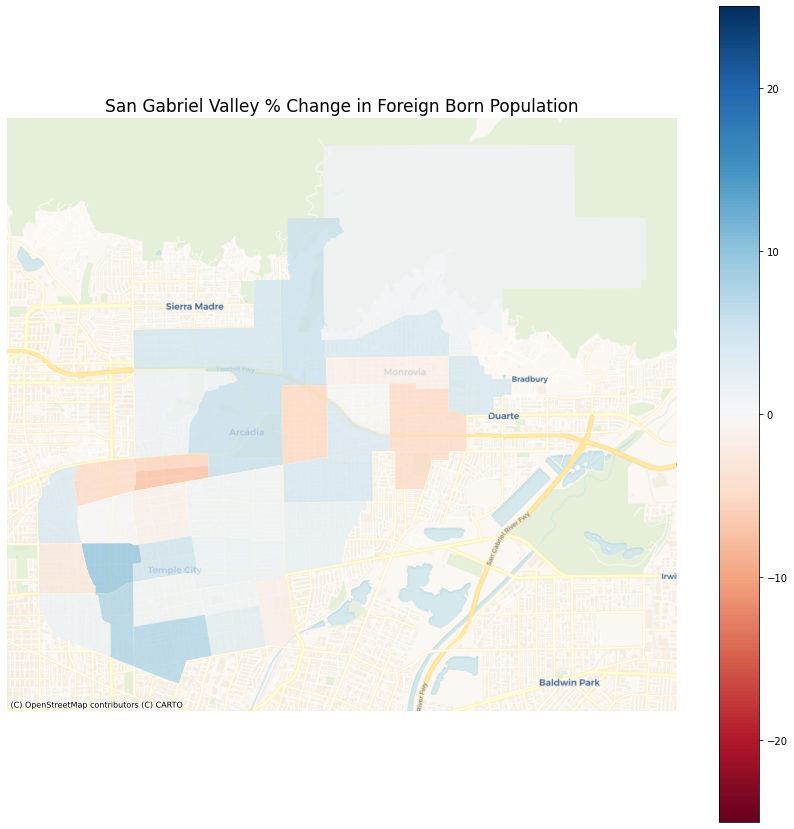

In [10]:
stn_map()

#plt.savefig("NSGV_ForeignBorn.jpg")

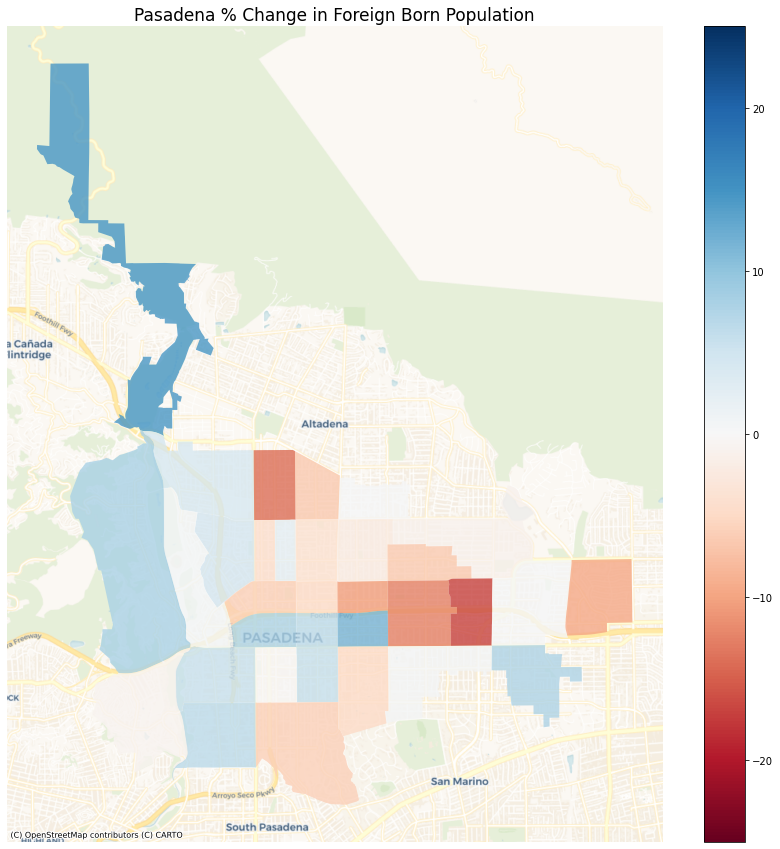

In [11]:
stn_map(region='Pasadena')

#plt.savefig("Pasadena_ForeignBorn.jpg")

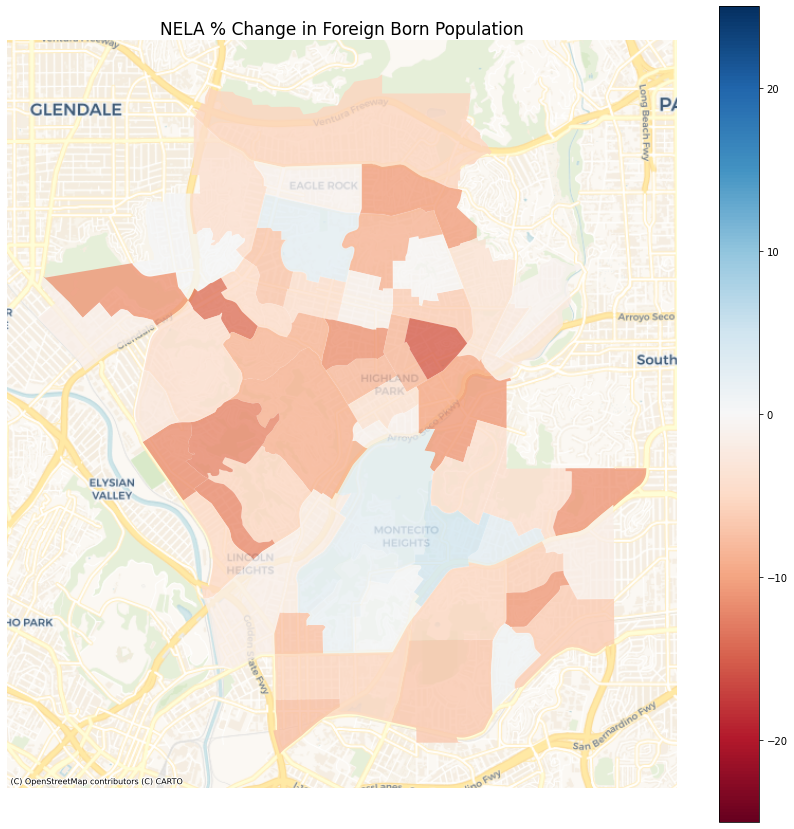

In [12]:
stn_map(region='NELA')

#plt.savefig("NELA_ForeignBorn.jpg")

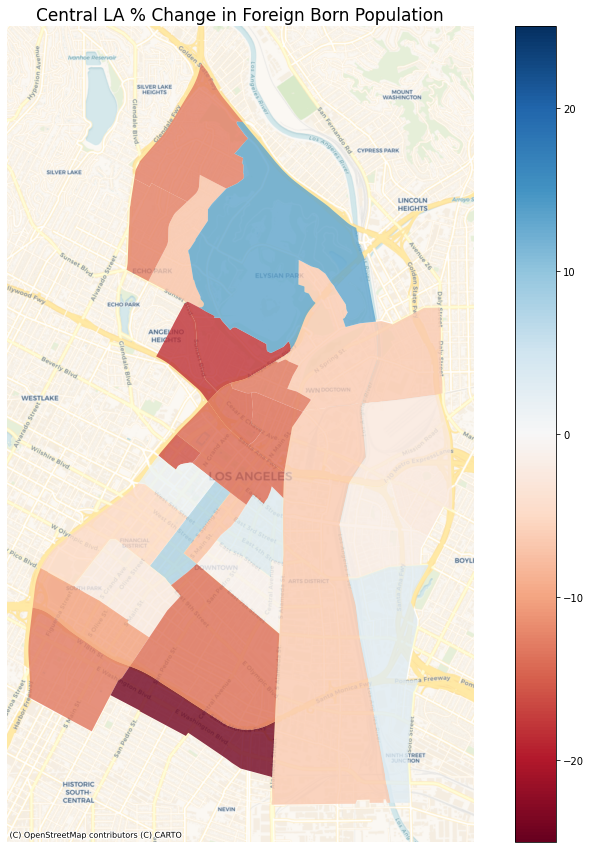

In [13]:
stn_map(region='Central LA')

#plt.savefig("Central_LA_ForeignBorn.jpg")

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


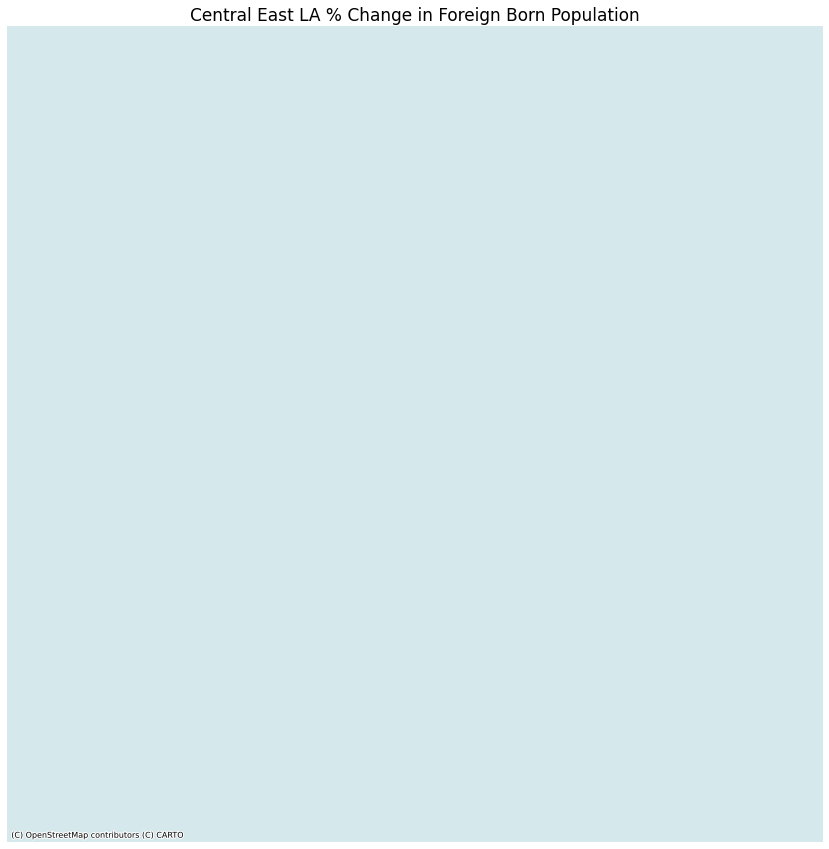

In [14]:
stn_map(region='Central East LA')

#plt.savefig("Central_East_LA_ForeignBorn.jpg")

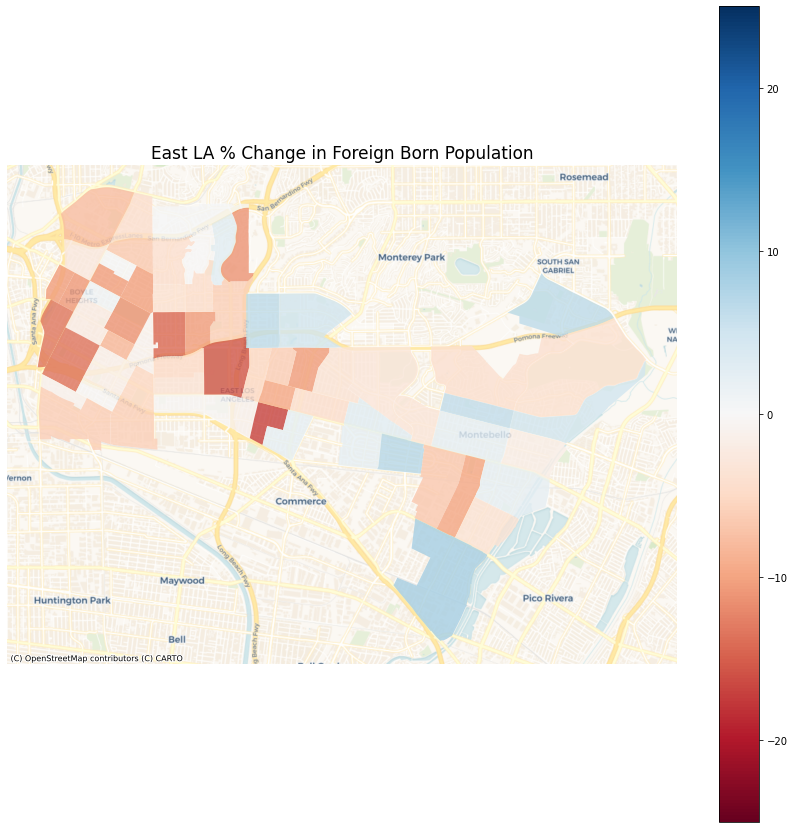

In [15]:
stn_map(region='East LA')

#plt.savefig("East_LA_ForeignBorn.jpg")

### Adding the station marker to the region maps

First, let's import the station site lat lons

In [17]:
site = gpd.read_file('Station_lat_lon-copy.csv')

In [18]:
site.head()

Station           Region      lat        lon field_5  \
0  East LA Civic Center Station          East LA  34.0332  -118.1614           
1        Mariachi Plaza Station  Central East LA  34.0475  -118.2192           
2             Chinatown Station       Central LA  34.0639  -118.2359           
3       Heritage Square Station             NELA  34.0871  -118.2126           
4         Highland Park Station             NELA  34.1112  -118.1926           

  field_6 field_7 geometry  
0                     None  
1              ,      None  
2                     None  
3                     None  
4                     None

Our csv is missing a geometry attribute so we use the existing lat lon in the dataframe to convert it into a geodataframe and activiate the geometry column.

In [19]:
site = gpd.GeoDataFrame(site, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(site.lon, site.lat))

In [20]:
site.head()

Station           Region      lat        lon field_5  \
0  East LA Civic Center Station          East LA  34.0332  -118.1614           
1        Mariachi Plaza Station  Central East LA  34.0475  -118.2192           
2             Chinatown Station       Central LA  34.0639  -118.2359           
3       Heritage Square Station             NELA  34.0871  -118.2126           
4         Highland Park Station             NELA  34.1112  -118.1926           

  field_6 field_7                     geometry  
0                  POINT (-118.16140 34.03320)  
1              ,   POINT (-118.21920 34.04750)  
2                  POINT (-118.23590 34.06390)  
3                  POINT (-118.21260 34.08710)  
4                  POINT (-118.19260 34.11120)

In [21]:
site.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now that we've confirmed that we have a functioning geometry. We project it to web mercator and add it to our function's code.

In [22]:
site_web_mercator = site.to_crs(epsg=3857)

In [36]:
def rgn_map(region = 'San Gabriel Valley', column = '% Change Foreign Born'):
    
    #this region
    this_region = gdf_web_mercator[gdf_web_mercator['region']==region]
                
    # plot it
    fig,ax = plt.subplots(figsize=(15, 15))
                
    this_region.plot(ax=ax,
                column=column, 
                vmin=-25,
                vmax=25,
                alpha=0.8,
                cmap="RdBu",
                legend=True)
    
    # this site
    this_site = site_web_mercator[site_web_mercator['Region']==region]
       
    # plot it
    #fig,ax = plt.subplots(figsize=(15, 15))
    
    this_site.plot(ax=ax, 
                   marker='o',
                   markersize=50,
                   color='red')

#Updating the code so that the loop incorporates the correct region name into the title
    ax.axis('off')
    ax.set_title(region + ' % Change in Foreign Born Population (2011-2019)', fontsize=17)
    
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

In [37]:
regions = ['East LA', 'Central LA', 'NELA', 'Pasadena', 'San Gabriel Valley']

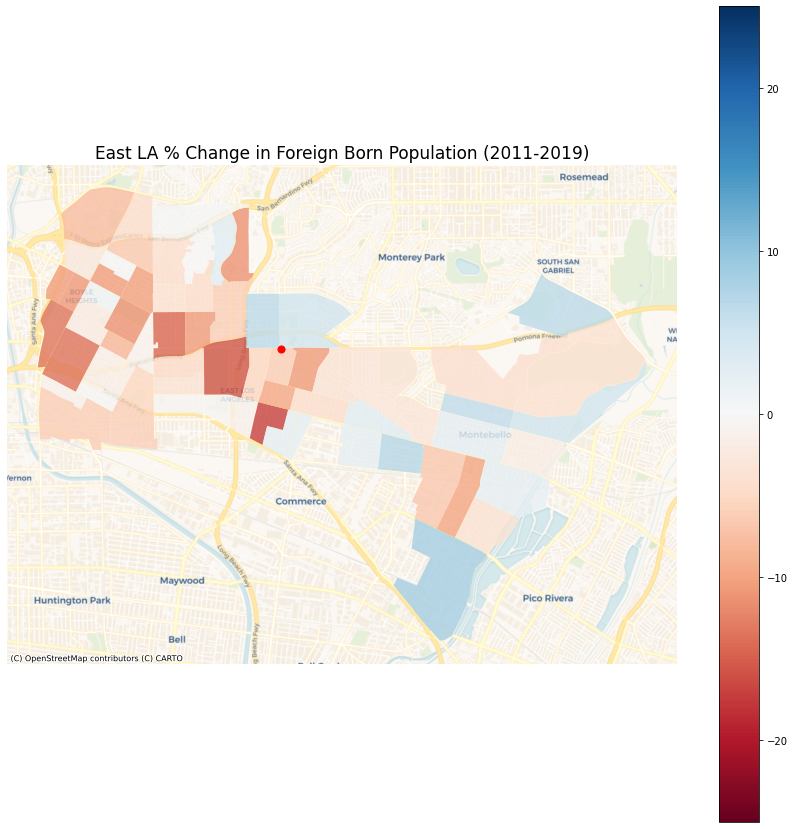

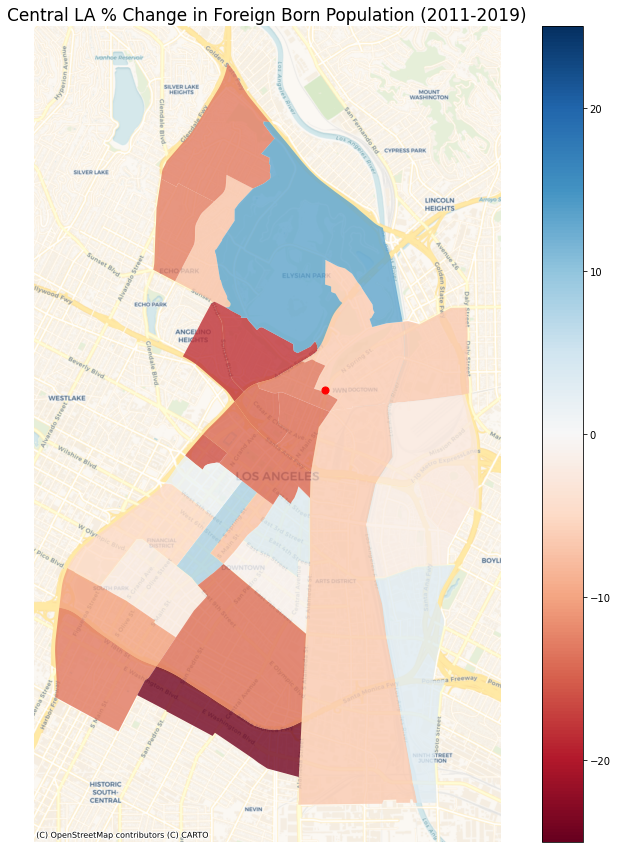

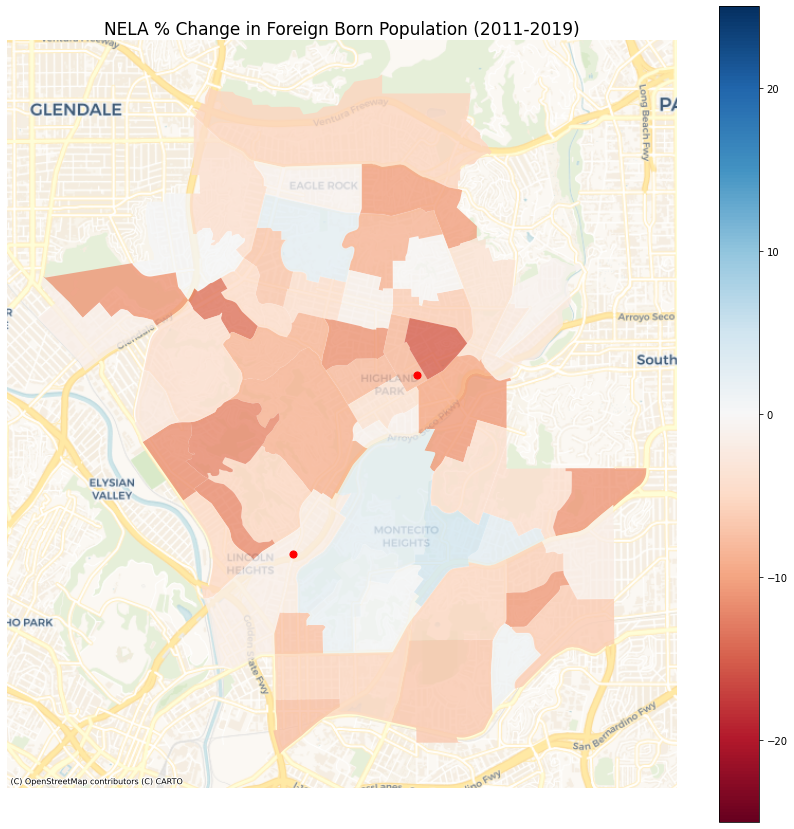

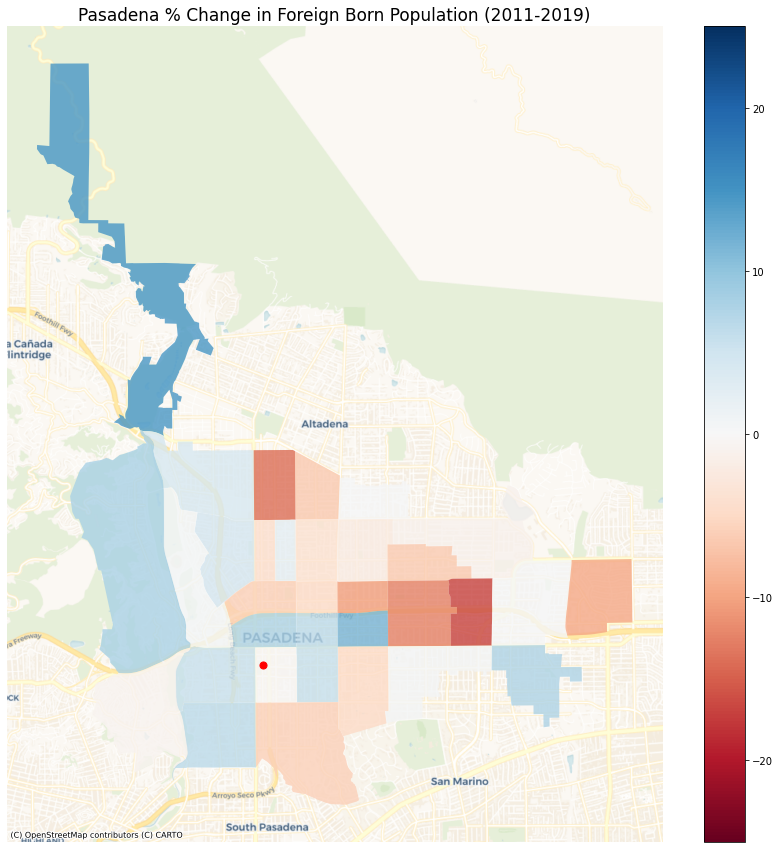

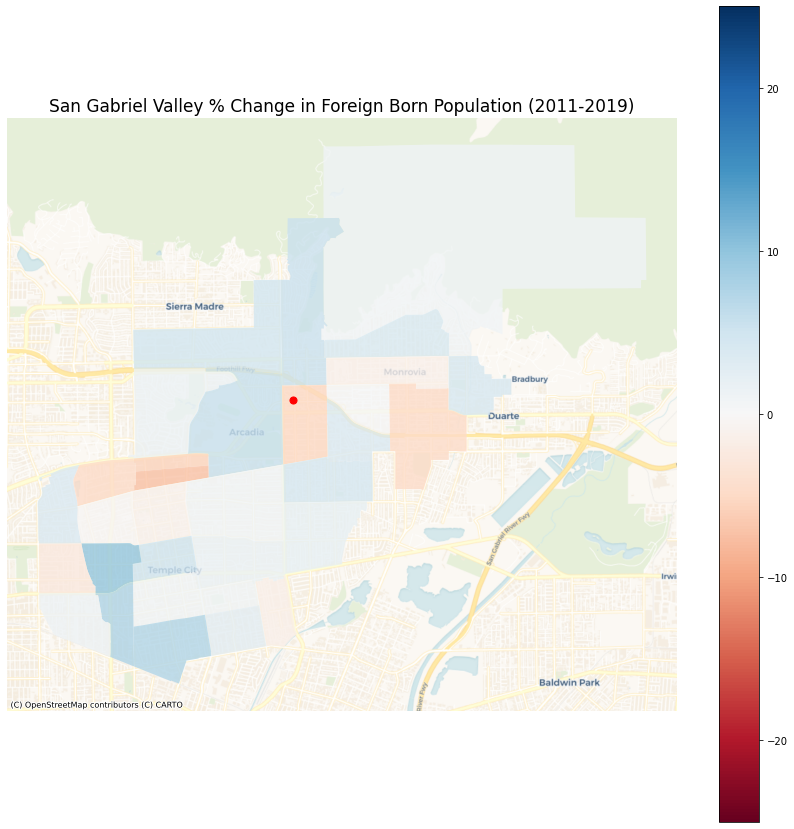

In [38]:
for region in regions:
    rgn_map(region = region)

In [ ]:
stn_map()

plt.savefig("NSGV_ForeignBorn.jpg")

In [ ]:
stn_map(region='Pasadena')

plt.savefig("Pasadena_ForeignBorn.jpg")

In [ ]:
stn_map(region='NELA')

plt.savefig("NELA_ForeignBorn.jpg")

In [ ]:
stn_map(region='Central LA')

plt.savefig("Central_LA_ForeignBorn.jpg")

In [ ]:
stn_map(region='Central East LA')

plt.savefig("Central_East_LA_ForeignBorn.jpg")

In [ ]:
stn_map(region='East LA')

plt.savefig("East_LA_ForeignBorn.jpg")